In [1]:
import torch
import torchvision
import os
import pickle

from dataset_operations import InputDataset, custom_collate_fn, get_transform, trainModel, read_mean_std

tile_size = 512

parent_dir = "rois2/"
img_dir = parent_dir + "images/"
tile_dir = parent_dir + "tiles/"
model_dir = parent_dir + "models/"

In [2]:
mean, std = read_mean_std(parent_dir + 'images/')

val_dataloader = pickle.load(open(model_dir + 'val_dataloader.pkl', 'rb'))
full_dataloader = pickle.load(open(model_dir + "full_dataloader.pkl", "rb"))

print(len(full_dataloader))
print(len(val_dataloader))

mean:  [0.77296131, 0.71338682, 0.68258603]
std:  [0.16751114, 0.19680141, 0.21965831]
11551
192


In [3]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2)
model = model.to('cuda')
model.load_state_dict(torch.load('rois2/models/round1_model_epoch77.pth'))
epoch_begin = 9


Model of epoch 8 loaded
Training started
     Epoch[9/50], train batch[100/11551], bbox loss: 0.547163313627243, current learning rate:  0.001
     Epoch[9/50], train batch[200/11551], bbox loss: 0.43985614661247496, current learning rate:  0.001
     Epoch[9/50], train batch[300/11551], bbox loss: 0.20190012454986572, current learning rate:  0.001
     Epoch[9/50], train batch[400/11551], bbox loss: 0.03745986521244049, current learning rate:  0.001
     Epoch[9/50], train batch[500/11551], bbox loss: 0.5415526628494263, current learning rate:  0.001
     Epoch[9/50], train batch[600/11551], bbox loss: 1.0055722925398085, current learning rate:  0.001
     Epoch[9/50], train batch[700/11551], bbox loss: 0.7883853346786716, current learning rate:  0.001
     Epoch[9/50], train batch[800/11551], bbox loss: 0.7302510142326355, current learning rate:  0.001
     Epoch[9/50], train batch[900/11551], bbox loss: 2.6489717801411947, current learning rate:  0.001
     Epoch[9/50], train batch[

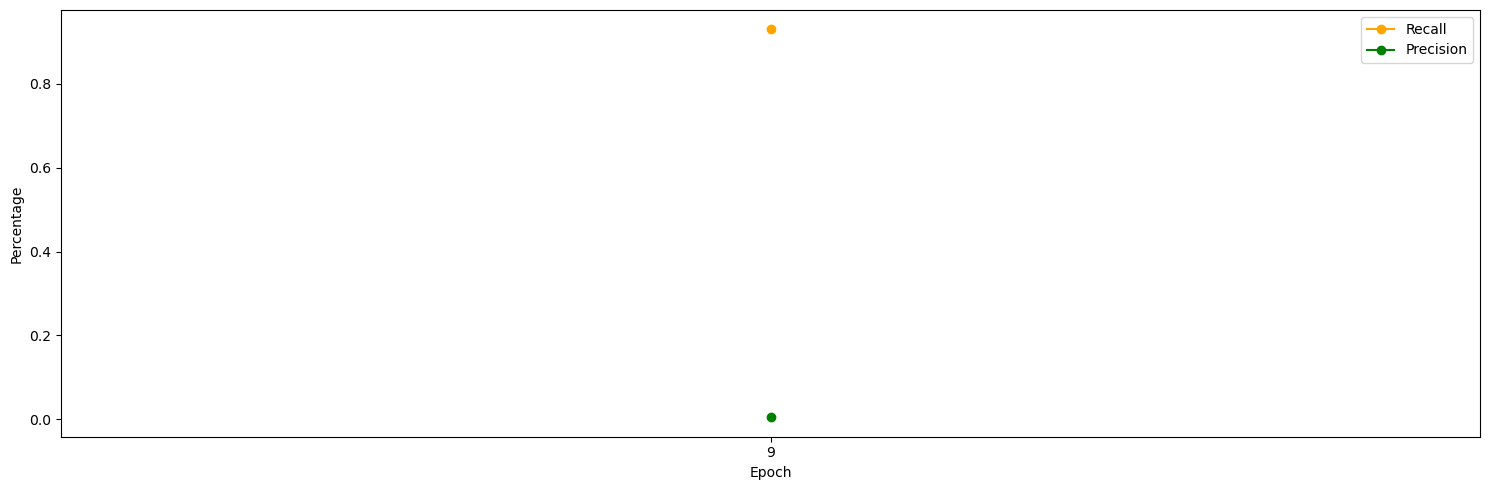

Training started
     Epoch[10/50], train batch[100/11551], bbox loss: 1.1342189631291797, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[200/11551], bbox loss: 0.6623892188072205, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[300/11551], bbox loss: 1.3653625529259443, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[400/11551], bbox loss: 0.0, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[500/11551], bbox loss: 0.35497643881373936, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[600/11551], bbox loss: 0.48950231075286865, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[700/11551], bbox loss: 2.244673013687134, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[800/11551], bbox loss: 1.1655643648571437, current learning rate:  0.0009990143508499217
     Epoch[10/50], train batch[900/11

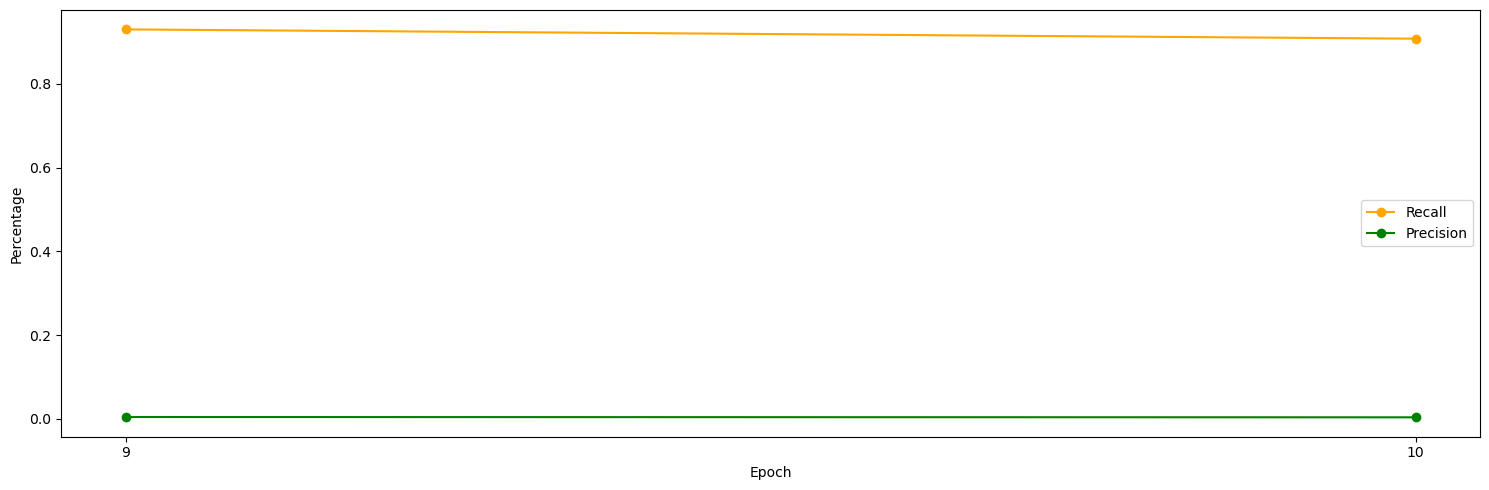

Training started
     Epoch[11/50], train batch[100/11551], bbox loss: 0.31344767411549884, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[200/11551], bbox loss: 0.4204866886138916, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[300/11551], bbox loss: 0.9154762029647827, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[400/11551], bbox loss: 0.0, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[500/11551], bbox loss: 0.5720889451711074, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[600/11551], bbox loss: 0.742848590016365, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[700/11551], bbox loss: 0.4636981752183702, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[800/11551], bbox loss: 0.09701929241418839, current learning rate:  0.0009960612933065818
     Epoch[11/50], train batch[900/11

KeyboardInterrupt: 

In [4]:
trainModel(model = model, 
           parent_dir=parent_dir, 
           train_dataloader=full_dataloader, 
           val_dataloader=val_dataloader, 
           epochs_num=50,
           epoch_begin=epoch_begin, 
           nms_thr=0.5, 
           iou_thr=0.5, 
           device='cuda',
           chkpt_name='round2_model',
           loss_penalty=2,
           lr_init=1e-3,
            lr_decay=0.1,
            lr_min=1e-6,
            scheduler_T_max=50
           )